# References | 2. Building Blocks, Data Representations, Optimisation

## 3Blue1Brown Series

[3Blue1Brown Series](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

## Aurélien Géron, Cross-Entropy

[Aurélien Géron, Intro to Entropy, Cross-Entropy, KL](https://www.youtube.com/watch?v=ErfnhcEV1O8)

## Alfredo Canziani, NN transformations

Here's one of the rare good visualisations of what is happening under the hood!

This network is *uncrumpling* the data (**three spirals: three classes**) in successive layers.

(I let you sole judge as to whether the data is **simpler** at the start or the end...)

At the end, the net is able to **separate the space into regions with only one class** (classification).

This is of course a very simple network with two neurons in each layer (only 2D transforms)!

[NYU Canziani Week 3, until 4.21](https://www.youtube.com/watch?v=FW5gFiJb-ig&start=180)  
[NYU Canziani Week 1 Practicum, until 16'10](https://www.youtube.com/watch?v=5_qrxVq1kvc&start=831)

## Linear transformations recap & visualisations

[Linear transformations recap & visualisations](https://www.youtube.com/embed/videoseries?si=iFlex1qKBiiR_svm&amp;list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## A simple example of linear transformations: a square

We will consider a layer transformation of a low dimensional object – a tensor holding four 2D points.

Each point is a corner of a square.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
a = np.array([1, -1])
b = np.array([1, 1])
c = np.array([-1, 1])
d = np.array([-1, -1])
x = np.array([a, b, c, d])
print(x, '\t', x.shape)

[[ 1 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]] 	 (4, 2)


In [20]:
def plot_poly(a, b, col, label=""):
    axes = plt.gca()
    axes.axis('equal')
    plt.plot(a, b, 'ro')
    plt.plot(a, b, color=col, linestyle = '-', label=label)
    plt.plot([a[-1], a[0]], [b[-1], b[0]], color=col, linestyle = '-')

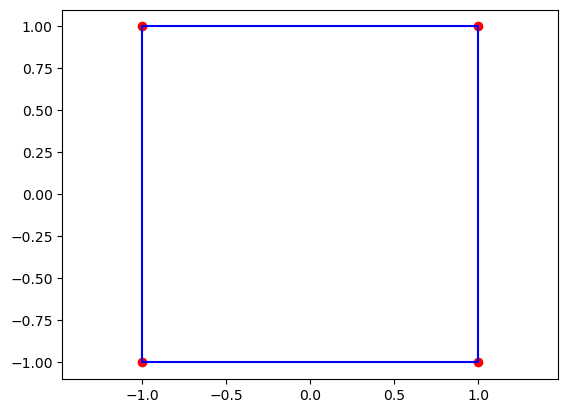

In [21]:
plot_poly(x[:, 0], x[:, 1], 'b')
plt.show()

$w \cdot x + b$ implements an affine transformation (for nonzero $b$):

- a linear transformation ($w$)
- followed by a translation ($b$)

In [22]:
theta = 1
w = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

y = np.zeros([4, 2])
for i in range(len(x)):
    y[i] = np.dot(w, x[i])

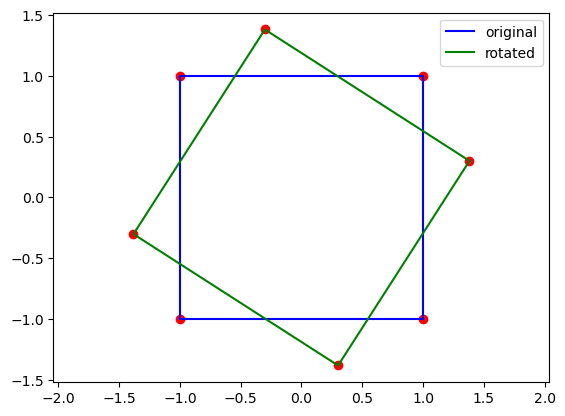

In [23]:
plot_poly(x[:, 0], x[:, 1], 'b', label="original")
plot_poly(y[:, 0], y[:, 1], 'g', label="rotated") # the blue square has been rotated by 1 radian (linear)
plt.legend()
plt.show()

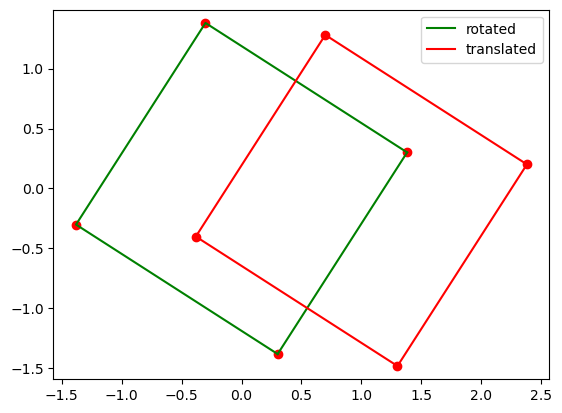

In [24]:
b = np.array([1, -0.1])
z = np.add(y, b)

plot_poly(y[:, 0], y[:, 1], 'g', label="rotated")
plot_poly(z[:, 0], z[:, 1], 'red', label="translated") # translation: affine
plt.legend()
plt.show()

Element-wise application of a nonlinear function to $w \cdot x + b$ will introduce *distortions*.

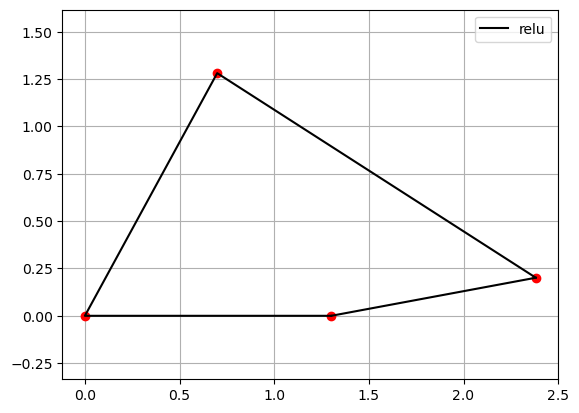

In [28]:
w = np.where(z > 0, z, 0) # ReLU (negatives -> 0, positives unchanged)

plot_poly(w[:, 0], w[:, 1], 'black', label="relu") # distortion
plt.grid()
plt.legend()
plt.show()

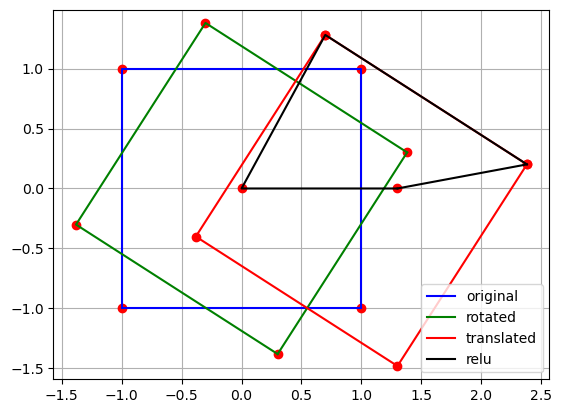

In [29]:
plot_poly(x[:, 0], x[:, 1], 'b', label="original")
plot_poly(y[:, 0], y[:, 1], 'g', label="rotated")
plot_poly(z[:, 0], z[:, 1], 'red', label="translated")
plot_poly(w[:, 0], w[:, 1], 'black', label="relu")
plt.grid()
plt.legend()
plt.show()

## The Gradient

[3Blue1Brown gradient](https://www.youtube.com/watch?v=_-02ze7tf08)  
Full playlist [here](https://www.youtube.com/playlist?list=PLSQl0a2vh4HC5feHa6Rc5c0wbRTx56nF7)

## Artem Kirsanov, Backpropagation

[Artem Kirsanov, The Most Important Algorithm in Machine Learning](https://www.youtube.com/watch?v=SmZmBKc7Lrs) 

## Andrew Ng, Momentum, RMSprop, Adam

[Andrew Ng, Gradient Descent With Momentum (C2W2L06) ](https://www.youtube.com/watch?v=k8fTYJPd3_I)  
[Andrew Ng, RMSProp (C2W2L07) ](https://www.youtube.com/watch?v=_e-LFe_igno)  
[Andrew Ng, Adam Optimization Algorithm (C2W2L08) ](https://www.youtube.com/watch?v=JXQT_vxqwIs)  
Full playlist [here](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc).

## Optimizers: the maths

### Momentum

**Momentum** is a method that helps accelerate SGD in the relevant direction and dampens oscillations  fraction. It does this by using an exponential moving average (EMA) (with hyperparameter $\beta$) of the gradients:

$$
\begin{align}
\begin{split}
v_t & = \beta v_{t-1} + (1 - \beta) \nabla_\theta J( \theta_{t-1}) \\
\theta_t & = \theta_{t-1} - \eta v_t
\end{split}
\end{align}
$$

$J$: loss  
$\theta$: model parameters  
$\nabla_{\theta}$: gradient w.r.t. the parameters  
$t$: training step  
$\beta$: momentum coefficient (hyperparameter,  often 0.9)  
$\eta$: learning rate (hyperparameter)

Note the variant that treats $\beta$ as a friction coefficient (equivalent to the above, implicitly scales $v_{t}$ by $\frac{1}{1-\beta}$, the shift is absorbed by $\eta$):

$$
v_t = \beta v_{t-1} - \nabla_\theta J( \theta_{t-1})
$$

The momentum term $\gamma$ is **usually set to 0.9** or a similar value.


### RMSProp

$$
\begin{align}
\begin{split}
v_t & = \beta v_{t-1} + (1 - \beta) \nabla_\theta J( \theta_{t-1})^2 \\
\theta_t & = \theta_{t-1} - \dfrac{\eta}{\sqrt{v_t + \epsilon} } \nabla_\theta J( \theta_{t-1})
\end{split}
\end{align}
$$

$J$: loss  
$\theta$: model parameters  
$\nabla_{\theta}$: gradient w.r.t. the parameters  
$t$: training step  
$\beta$: momentum coefficient (hyperparameter,  often 0.9)  
$\eta$: learning rate (hyperparameter)  
$\epsilon$: small value (for numerical stability)

Formally, $v$ is  the expected value of the square of the gradients  $E[\nabla_\theta J( \theta)^2]$.

Thus, RMSprop  divides the learning rate by an **exponentially decaying average of squared gradients**.

Proposed by a student in [this Coursera class by Geoffrey Hinton](https://www.youtube.com/playlist?list=PLLssT5z_DsK_gyrQ_biidwvPYCRNGI3iv).

### Adam (Adaptive Moment Estimation)

$$
\begin{align}
\begin{split}
m_t & = \beta_1 m_{t-1} + (1 - \beta_1) \nabla_\theta J( \theta_{t-1}) \\
v_t & = \beta_2 v_{t-1} + (1 - \beta_2) \nabla_\theta J( \theta_{t-1})^2
\end{split}
\end{align}
$$

$m_t$ and $v_t$ are estimates of the first moment (the mean, as in **Momentum**) and the second moment (the uncentered variance, as in **RMSprop**) of the gradients respectively, hence the name.

Optionally, to counteract the initial zero-bias of exponential moving averages at the start of training:

$$
\hat{m}_t = \dfrac{m_t}{1 - \beta^t_1},\ \hat{v}_t = \dfrac{v_t}{1 - \beta^t_2}
$$

$J$: loss  
$\theta$: model parameters  
$\nabla_{\theta}$: gradient w.r.t. the parameters  
$t$: training step  
$\beta_1, beta_2$: momentum coefficients (hyperparameters)  
$\eta$: learning rate (hyperparameter)  
$\epsilon$: small value (for numerical stability)

The Adam update rule uses he same division as **RMSprop**, but with **Momentum** gradients:

$$
\theta_t = \theta_{t-1} - \dfrac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
$$

Recommended values: $\beta_1  = 0.9, \beta_2 = 0.999, \epsilon = 10^{-8}$.

[Diederik P. Kingma, Jimmy Ba, Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980)

### More!

#### AdamW

$$
\small \begin{array}{l}
\hline
\text{Adam with } \color{magenta}{ L_2 } \color{black}  \text{ regularization and } \color{lime}{ AdamW } \\
\hline
\text{1:} \ \textbf{given } \alpha = 0.001, \ \beta_1 = 0.9, \ \beta_2 = 0.999, \ \epsilon = 10^{-8}, \ \lambda \in \mathbb{R} \\
\text{2:} \ \text{initialize time step } t \leftarrow 0, \ \theta_{t=0} \in \mathbb{R}^n, \ m_{t=0} \leftarrow 0, \ v_{t=0} \leftarrow 0, \ \eta_{t=0} \in \mathbb{R} \\
\text{3:} \ \textbf{repeat} \\
\text{4:} \ \ t \leftarrow t + 1 \\
\text{5:} \ \ \nabla f_t(\theta_{t-1}) \leftarrow \text{SelectBatch}(\theta_{t-1}) \\
\text{6:} \ \ g_t \leftarrow \nabla f_t(\theta_{t-1}) + \color{magenta}{ \lambda \theta_{t-1} } \\
\text{7:} \ \ m_t \leftarrow \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
\text{8:} \ \ v_t \leftarrow \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
\text{9:} \ \ \hat{m}_t \leftarrow \frac{ m_t }{ (1 - \beta_1^t) } \\
\text{10:} \ \ \hat{v}_t \leftarrow \frac{ v_t }{ (1 - \beta_2^t) } \\
\text{11:} \ \ \eta_t \leftarrow \text{SetScheduleMultiplier}(t) \\
\text{12:} \ \ \theta_t \leftarrow \theta_{t-1} - \eta_t \left( \frac{ \alpha \hat{m}_t }{ \sqrt{\hat{v}_t} + \epsilon } + \color{lime}{ \lambda \theta_{t-1} } \color{black} \right) \\
\text{13:} \ \textbf{until} \ \text{stopping criterion is met} \\
\text{14:} \ \textbf{return } \theta_t \\
\hline
\end{array}
$$

[Ilya Loshchilov, Frank Hutter, Decoupled Weight Decay Regularization](https://arxiv.org/abs/1711.05101)

#### Muon

$$
\small \begin{array}{l}
\hline
\textbf{Muon} \\
\hline
\textbf{input: } \gamma \ (\text{lr}),\ \lambda \ (\text{weight decay}),\ \mu \ (\text{momentum}),\ \text{nesterov} \in \{ \text{True}, \text{False} \}, \\
\quad (a,b,c)\ (\text{NS coefficients}),\ \varepsilon\ (\text{epsilon}),\ k\ (\text{NS steps}),\ \theta_0\ (\text{params}), \ f(\theta)\ (\text{objective}) \\
\textbf{initialize: } B_0 \leftarrow 0\ (\text{momentum buffer}) \\
\\
\textbf{for } t = 1 \text{ to } \ldots \ \textbf{do} \\
\quad g_t \leftarrow \nabla_\theta f_t(\theta_{t-1}) \\
\quad B_t \leftarrow \mu B_{t-1} + g_t \\
\quad \tilde{B}_t \leftarrow
\begin{cases}
g_t + \mu B_t, & \text{if nesterov} = \text{True} \\
B_t, & \text{if nesterov} = \text{False}
\end{cases} \\
\quad O_t \leftarrow \text{NS}^{(a,b,c)}_k(\tilde{B}_t; \varepsilon) \\
\quad \theta_t \leftarrow \theta_{t-1} - \gamma \lambda \theta_{t-1} \quad (\text{decoupled weight decay}) \\
\quad \gamma \leftarrow \text{AdjustLR}(\gamma;\ \text{shape}(\theta_t)) \\
\quad \theta_t \leftarrow \theta_t - \gamma O_t \\
\textbf{end for} \\
\\
\textbf{return } \theta_t \\
\hline
\end{array}
$$

Here, $NS_k^{ (a,b,c) } (\cdot;\epsilon)$ denotes \(k\) iterations of the Newton–Schulz orthogonalization operator parameterized by coefficients $(a,b,c)$ with numerical stabilization \(\epsilon\).

The purpose for $\text{AdjustLR}(\gamma; \text{ shape } (\theta_t) )$ is to make the orthogonalized update have a consistent $RMS$ across rectangular matrices.

Keller’s original implementation scales the update by $\max(1,BA)$, where \(A\) and \(B\) are dimension of the matrix being optimized.

Moonshot’s implementation also focuses on matching \(RMS\) of AdamW. The adjustment is computed as: $\gamma \leftarrow 0.2 \gamma \max(A,B)$.

[Keras docs](https://keras.io/api/optimizers/muon/), [PyTorch docs](https://docs.pytorch.org/docs/main/generated/torch.optim.Muon.html)  
[Liu et al., Muon is Scalable for LLM Training](https://arxiv.org/abs/2502.16982)  
[Jordan Keller, Muon: An optimizer for hidden layers in neural networks](https://kellerjordan.github.io/posts/muon/)

## Backpropagation

For those of you who would want to go deeper, or feel like they learn effectively by being exposted to several perspectives, here are several excellent and in-depth lectures on this.

Also, here's the official TensorFlow [Introduction to gradients and automatic differentiation](https://www.tensorflow.org/guide/autodiff).

[Backpropagation (Stanford CS 231 2016)](https://www.youtube.com/watch?v=i94OvYb6noo) (Karpathy was still there!)  
[Backpropagation (Stanford CS 231 2017)](https://www.youtube.com/watch?v=d14TUNcbn1k)  
[Backpropagation (Stanford NLP 2017)](https://www.youtube.com/watch?v=isPiE-DBagM)

### Andrej Karpathy, backpropagation from scratch, by hand, in numpy! 🧙

[`micrograd` repo](https://github.com/karpathy/micrograd)  
[Karpathy,  The spelled-out intro to neural networks and backpropagation: building micrograd ](https://www.youtube.com/watch?v=VMj-3S1tku0)  
Part of a playlist: [Neural Networks: Zero to Hero](https://m.youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ)

### Sasha Rusch's `Minitorch`, build a backpropagation engine from scratch

[`minitorch` site](https://minitorch.github.io/)  
[`minitorch` repos](https://github.com/minitorch)  
[MiniTorch - Fundamentals (0.1)](https://www.youtube.com/watch?v=cX59_bR2cp4)  
Part of a playlist: [MiniTorch: A DIY Course on Machine Learning Engineering](https://www.youtube.com/playlist?list=PLO45-80-XKkQyROXXpn4PfjF1J2tH46w8)